<a href="https://colab.research.google.com/github/ethanongkj/housing-price-predictions/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ethanongkj/housing-price-predictions/main/House_Rent_Dataset.csv' # fetch data from github; change github.com to raw.githubusercontent.com and delete /blob
housing_prices = pd.read_csv(url)

housing_prices.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [109]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [110]:
housing_prices.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

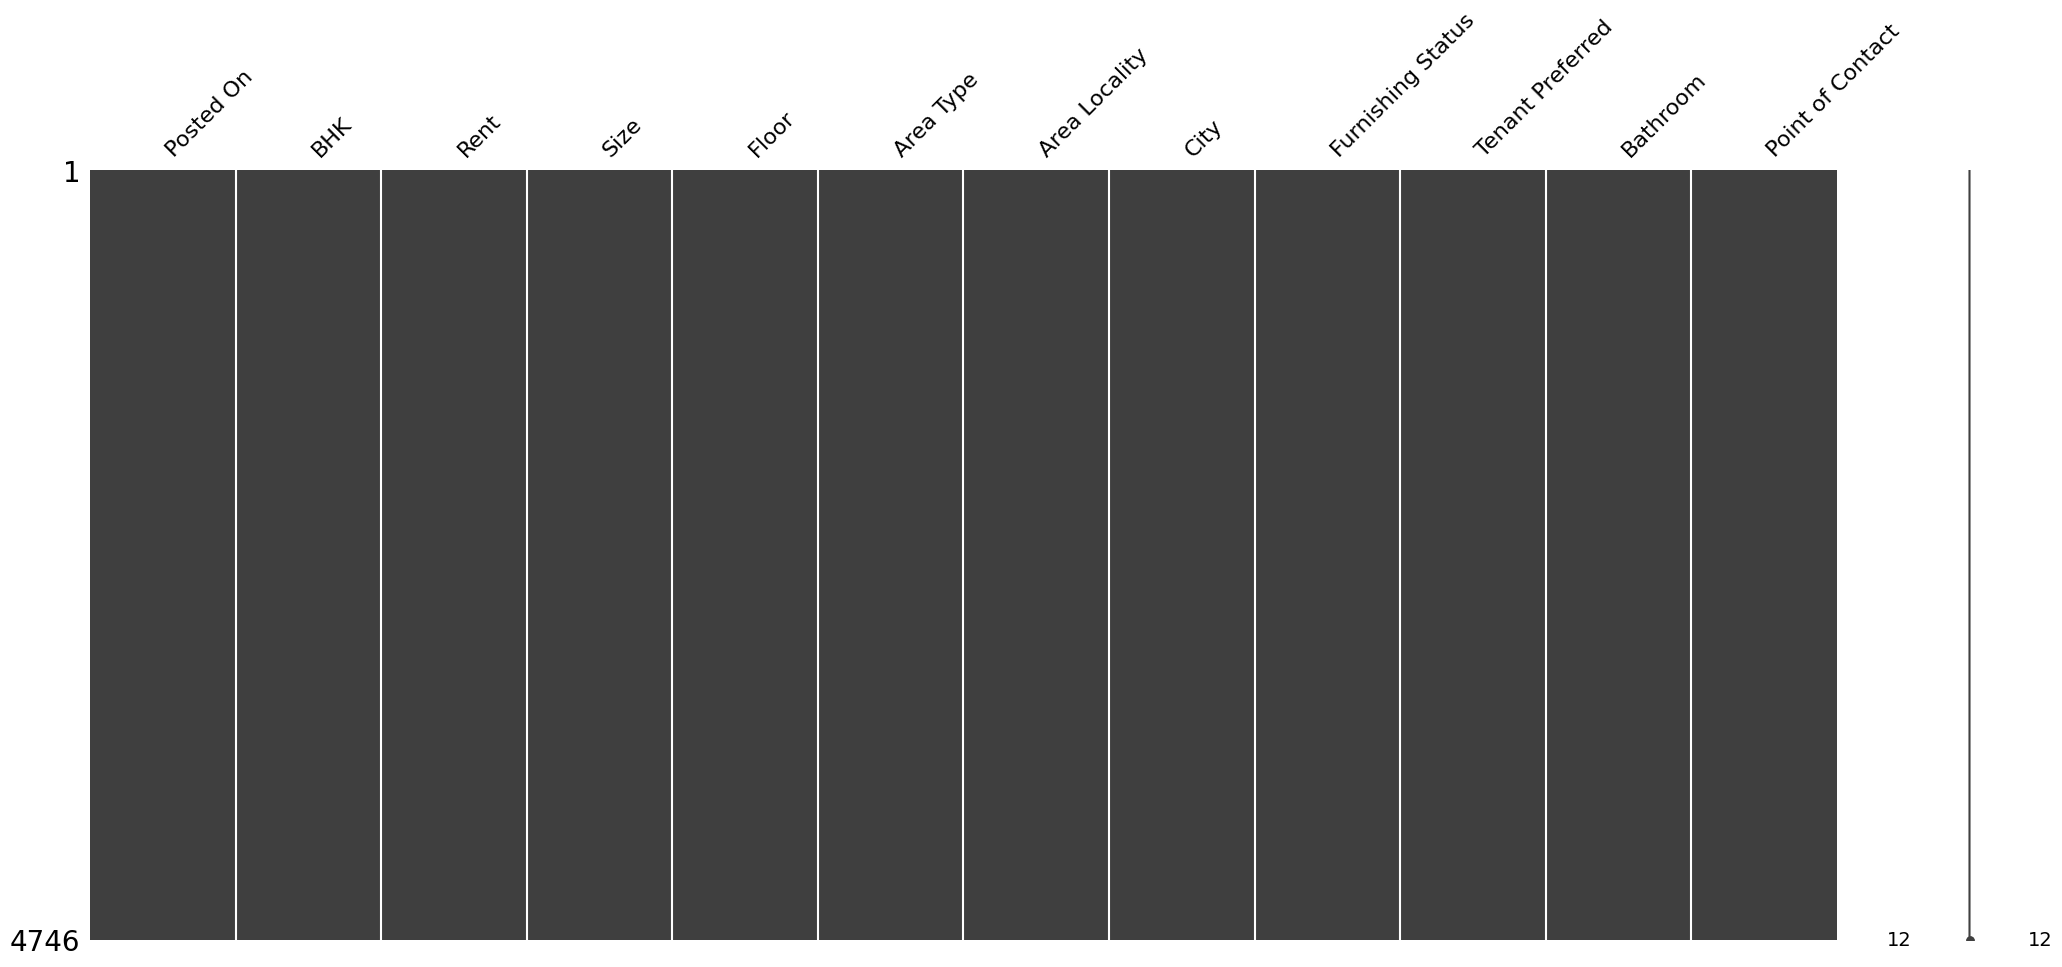

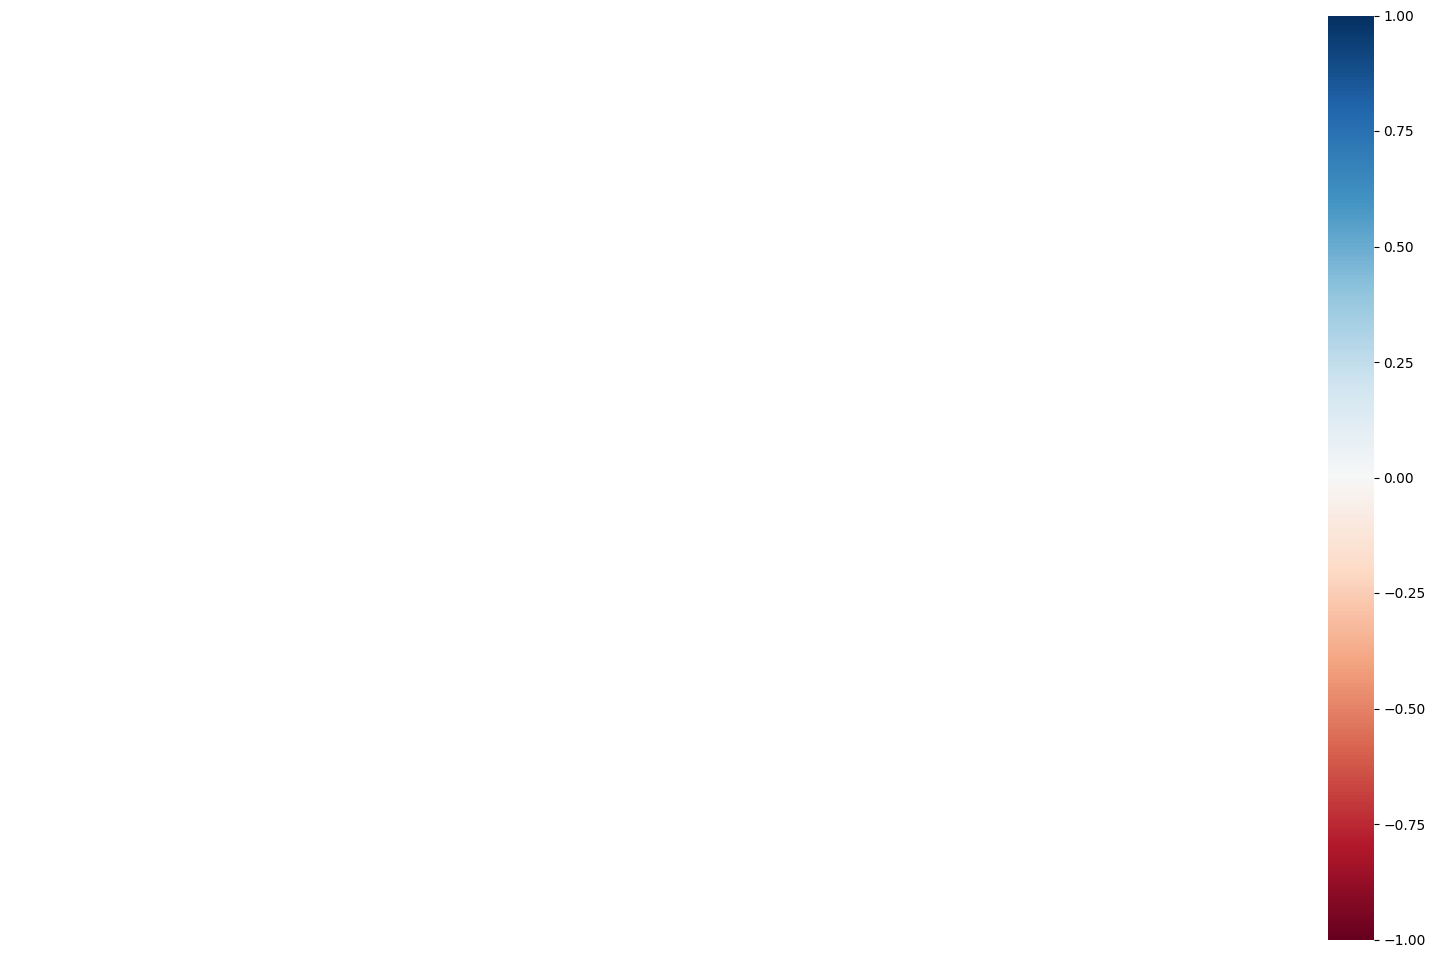

In [111]:
import missingno as msno #checking for missing values
msno.matrix(housing_prices)
msno.heatmap(housing_prices)

In [112]:
housing_prices.isnull().sum().sort_values(ascending=False)

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [113]:
housing_prices.dtypes

#Converting 'Posted On' to individual year, month, day
housing_prices['Posted On'] = pd.to_datetime(housing_prices['Posted On'])

housing_prices['Year'] = housing_prices['Posted On'].dt.year
housing_prices['Month'] = housing_prices['Posted On'].dt.month
housing_prices['DayOfWeek'] = housing_prices['Posted On'].dt.dayofweek
housing_prices['DaysSincePosted'] = (housing_prices['Posted On'].max() - housing_prices['Posted On']).dt.days

housing_prices = housing_prices.drop('Posted On', axis=1)


In [114]:
#Converting floor to house floor and total floors
import numpy as np
import re

def simple_floor_parser(floor_str):
    if not isinstance(floor_str, str):
        return np.nan, np.nan

    s = floor_str.lower()

    # Initialize
    floor_number = np.nan
    total_floors = np.nan

    # Extract total floors if "out of" exists
    if 'out of' in s:
        parts = s.split('out of', 1)
        floor_part = parts[0].strip()
        total_part = parts[1].strip()

        # Try to get total floors number
        total_nums = re.findall(r'\d+', total_part)
        if total_nums:
            total_floors = int(total_nums[0])
    else:
        floor_part = s.strip()

    # Determine floor_number
    if 'upper basement' in floor_part:
        floor_number = -2
    elif 'ground' in floor_part:
        floor_number = 0
    else:
        nums = re.findall(r'\d+', floor_part)
        if nums:
            floor_number = int(nums[0])

    return floor_number, total_floors

housing_prices.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,DayOfWeek,DaysSincePosted
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,2,54
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,4,59
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,0,56
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,0,7
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,0,63


In [115]:
housing_prices_encoded = pd.get_dummies(
    housing_prices,
    columns=[col for col in housing_prices.select_dtypes(include='object').columns]
 ) #convert categorical variables into binary
bool_cols = housing_prices_encoded.select_dtypes(include='bool').columns # convert boolean to binary
housing_prices_encoded[bool_cols] = housing_prices_encoded[bool_cols].astype(int)

housing_prices_encoded.head()

,BHK,Rent,Size,Bathroom,Year,Month,DayOfWeek,DaysSincePosted,Floor_1,Floor_1 out of 1,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,2022,5,2,54,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,2022,5,4,59,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,2022,5,0,56,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,2022,7,0,7,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,2022,5,0,63,0,0,...,0,0,0,1,1,0,0,0,0,1


In [116]:
housing_prices['floor_number'], housing_prices['total_floors'] = zip(*housing_prices['Floor'].apply(parse_floor_general))
housing_prices = housing_prices.drop('Floor', axis=1)
housing_prices = housing_prices.drop('Area Locality', axis = 1) # Area locality gives details that are too granular, may be worth looking into if data that specific results in significant results

housing_prices.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,DayOfWeek,DaysSincePosted,floor_number,total_floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,2,54,0.0,2.0
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,4,59,1.0,3.0
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,0,56,1.0,3.0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,0,7,1.0,2.0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,0,63,1.0,2.0


In [119]:
target = 'Rent' #key dependent variable
features = housing_prices_encoded.drop(columns=[target]).columns.tolist()

In [120]:
from sklearn.model_selection import train_test_split

X = housing_prices_encoded[features]
y = housing_prices_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67) #splitting into training and testing data

print(X_train.dtypes.value_counts())

int64    2737
int32       3
Name: count, dtype: int64


In [121]:
print(X_train.isnull().sum().sort_values(ascending=False).head(10))
print(y_train.isnull().sum())

nan_rows = X_train[X_train.isnull().any(axis=1)]
print(nan_rows)

Point of Contact_Contact Owner               0
BHK                                          0
Size                                         0
Bathroom                                     0
Area Locality_villvam towers tnhb colony     0
Area Locality_venkatesa perumal nagar        0
Area Locality_venkatapuram                   0
Area Locality_vanamali chs ghatla, Ghatla    0
Area Locality_tollygunge Kabardanga          0
Area Locality_sunanda circal                 0
dtype: int64
0
Empty DataFrame
Columns: [BHK, Size, Bathroom, Year, Month, DayOfWeek, DaysSincePosted, Floor_1, Floor_1 out of 1, Floor_1 out of 10, Floor_1 out of 11, Floor_1 out of 12, Floor_1 out of 13, Floor_1 out of 14, Floor_1 out of 15, Floor_1 out of 16, Floor_1 out of 19, Floor_1 out of 2, Floor_1 out of 20, Floor_1 out of 22, Floor_1 out of 24, Floor_1 out of 3, Floor_1 out of 35, Floor_1 out of 4, Floor_1 out of 5, Floor_1 out of 6, Floor_1 out of 7, Floor_1 out of 8, Floor_1 out of 9, Floor_10 out of 10, Floor_10

In [123]:
# using a linear regression
from sklearn.linear_model import LinearRegression
pricing_model = LinearRegression()
pricing_model.fit(X_train, y_train)

LinearRegression()

In [124]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = pricing_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 65264.51
R^2: -0.04


In [127]:
# verifying
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(pricing_model)  # should show the trained model object

(3796, 2740) (3796,)
(950, 2740) (950,)
LinearRegression()


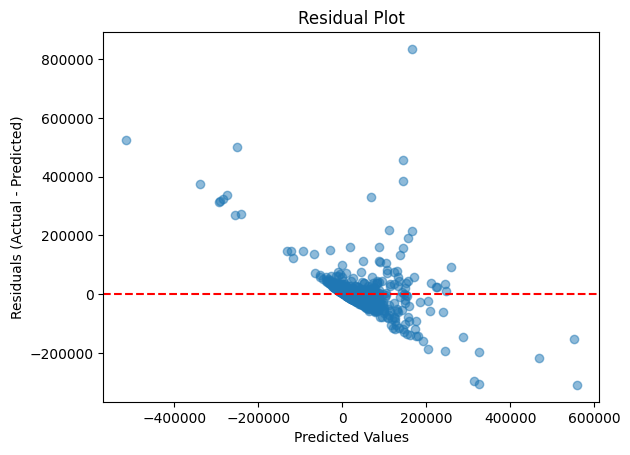

In [128]:
#checking residuals
import matplotlib.pyplot as plt

# Predict on test set
y_pred = pricing_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Scatter plot: predicted values vs residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()